In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct +=1
    return (correct/float(len(testSet))) * 100.0

In [3]:
import pandas as pd
lData = pd.read_excel('letterdata.xlsx')
lData.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [4]:
X,y = np.array(lData)[ :, 1:16], np.array(lData.letter)[:]

In [5]:
X_train = X[:16000, :]
X_test = X[16001: , :]
y_train = y[:16000]
y_test = y[16001:]

In [6]:
clf = svm.SVC(gamma = 0.025, C=3)

In [7]:
clf.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
getAccuracy(y_test, y_pred)

96.07401850462615

In [12]:
y_grid = (np.column_stack([y_test,y_pred]))
print(y_grid)

[['N' 'N']
 ['V' 'V']
 ['I' 'I']
 ...
 ['T' 'T']
 ['S' 'S']
 ['A' 'A']]


In [45]:
np.savetxt("ocr.csv",y_grid,fmt='%s')

In [14]:
import string
lab = list(string.ascii_uppercase[0:26])
plab = ["Pr "+s for s in lab]
plab

['Pr A',
 'Pr B',
 'Pr C',
 'Pr D',
 'Pr E',
 'Pr F',
 'Pr G',
 'Pr H',
 'Pr I',
 'Pr J',
 'Pr K',
 'Pr L',
 'Pr M',
 'Pr N',
 'Pr O',
 'Pr P',
 'Pr Q',
 'Pr R',
 'Pr S',
 'Pr T',
 'Pr U',
 'Pr V',
 'Pr W',
 'Pr X',
 'Pr Y',
 'Pr Z']

<Axes: >

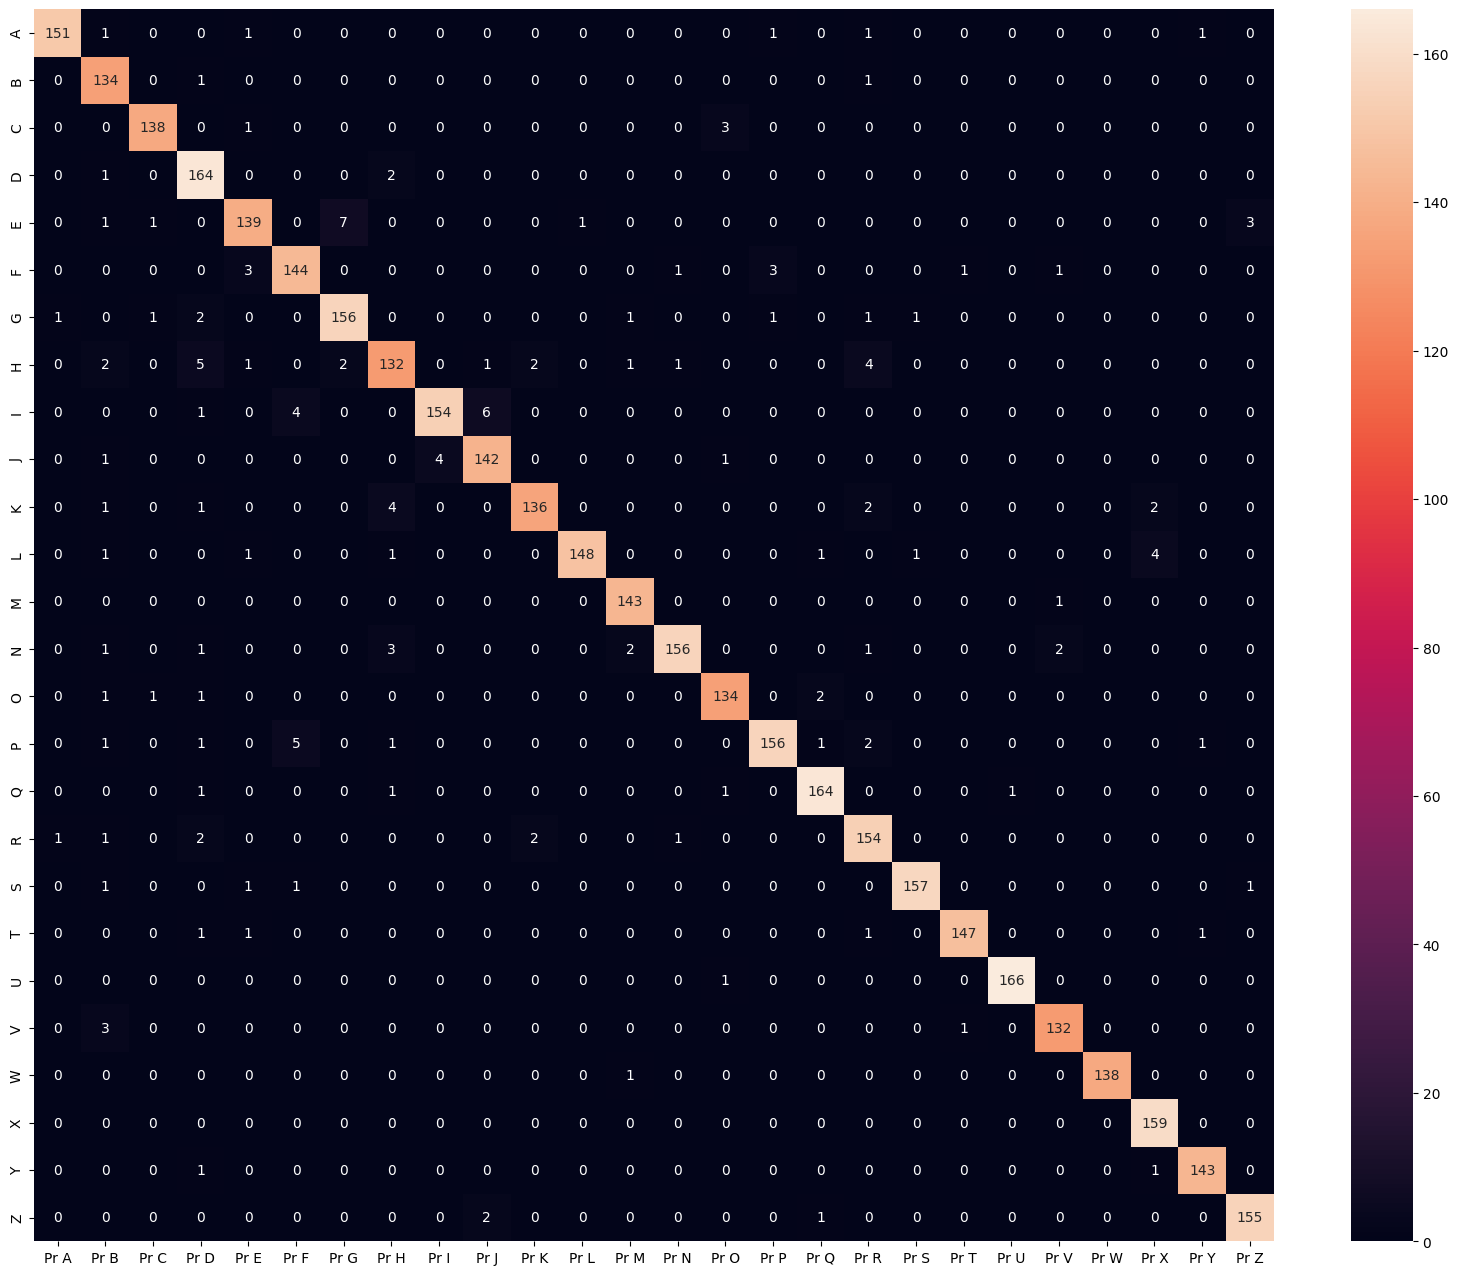

In [15]:
from sklearn import metrics
import seaborn as sns
cm= metrics.confusion_matrix(y_test,y_pred, labels=lab)
df_cm = pd.DataFrame(cm,index = [i for i in lab], columns = [i for i in plab])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot= True,fmt='g')